#Qiskit 157 D
5 server 5 vm

Riparto da Qiskit 97 che ha bei valori

##Beginning settings

In [1]:
try: INSTALLED
except NameError: INSTALLED = None

if INSTALLED!=1:
  !pip install Qiskit ipywidgets
  !pip install qiskit
  !pip install qiskit_optimization
  !pip install qiskit-optimization
  !pip install cplex
  !pip install ibm-quantum-widgets
  !pip install docplex
  INSTALLED=1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docplex: filename=docplex-2.25.236-py3-none-any.

In [2]:
import matplotlib.pyplot as plt

from docplex.mp.model import Model

from qiskit_algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import CobylaOptimizer, MinimumEigenOptimizer
from qiskit_optimization.algorithms.admm_optimizer import ADMMParameters, ADMMOptimizer
from qiskit_optimization.translators import from_docplex_mp

# If CPLEX is installed, you can uncomment this line to import the CplexOptimizer.
# CPLEX can be used in this tutorial to solve the convex continuous problem,
# but also as a reference to solve the QUBO, or even the full problem.
#
# from qiskit.optimization.algorithms import CplexOptimizer

In [3]:
# define COBYLA optimizer to handle convex continuous problems.
cobyla = CobylaOptimizer()

# define QAOA via the minimum eigen optimizer
qaoa = MinimumEigenOptimizer(QAOA(sampler=Sampler(), optimizer=COBYLA()))

# exact QUBO solver as classical benchmark
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())  # to solve QUBOs

# in case CPLEX is installed it can also be used for the convex problems, the QUBO,
# or as a benchmark for the full problem.
#
# cplex = CplexOptimizer()

##Problem definition

In [4]:
# construct model using docplex
mdl = Model("ex157D")

#server = M = 5 = i = i0, i1, i2, i3, i4
#virtual machine = N = 5 = j = j0, j1, j2, j3, j4
#all servers have the same idle and dynamic power consumption
#all servers have the same maximum cpu capacity

si0 = mdl.binary_var(name="si0")
si1 = mdl.binary_var(name="si1")
si2 = mdl.binary_var(name="si2")
si3 = mdl.binary_var(name="si3")
si4 = mdl.binary_var(name="si4")

vj0i0 = mdl.continuous_var(name="vj0i0")
vj1i0 = mdl.continuous_var(name="vj1i0")
vj2i0 = mdl.continuous_var(name="vj2i0")
vj3i0 = mdl.continuous_var(name="vj3i0")
vj4i0 = mdl.continuous_var(name="vj4i0")

vj0i1 = mdl.continuous_var(name="vj0i1")
vj1i1 = mdl.continuous_var(name="vj1i1")
vj2i1 = mdl.continuous_var(name="vj2i1")
vj3i1 = mdl.continuous_var(name="vj3i1")
vj4i1 = mdl.continuous_var(name="vj4i1")

vj0i2 = mdl.continuous_var(name="vj0i2")
vj1i2 = mdl.continuous_var(name="vj1i2")
vj2i2 = mdl.continuous_var(name="vj2i2")
vj3i2 = mdl.continuous_var(name="vj3i2")
vj4i2 = mdl.continuous_var(name="vj4i2")

vj0i3 = mdl.continuous_var(name="vj0i3")
vj1i3 = mdl.continuous_var(name="vj1i3")
vj2i3 = mdl.continuous_var(name="vj2i3")
vj3i3 = mdl.continuous_var(name="vj3i3")
vj4i3 = mdl.continuous_var(name="vj4i3")

vj0i4 = mdl.continuous_var(name="vj0i4")
vj1i4 = mdl.continuous_var(name="vj1i4")
vj2i4 = mdl.continuous_var(name="vj2i4")
vj3i4 = mdl.continuous_var(name="vj3i4")
vj4i4 = mdl.continuous_var(name="vj4i4")

pi0 = 1
pd0 = 1
pi1 = 1
pd1 = 1
pi2 = 1
pd2 = 1
pi3 = 1
pd3 = 1
pi4 = 1
pd4 = 1
ci0 = 50
ci1 = 50
ci2 = 50
ci3 = 50
ci4 = 50

uj0 = mdl.continuous_var(name="uj0")
uj1 = mdl.continuous_var(name="uj1")
uj2 = mdl.continuous_var(name="uj2")
uj3 = mdl.continuous_var(name="uj3")
uj4 = mdl.continuous_var(name="uj4")

mdl.minimize(pi0*si0+pd0*(uj0*vj0i0+uj1*vj1i0+uj2*vj2i0+uj3*vj3i0+uj4*vj4i0)+pi1*si1+pd1*(uj0*vj0i1+uj1*vj1i1+uj2*vj2i1+uj3*vj3i1+uj4*vj4i1)+pi2*si2+pd2*(uj0*vj0i2+uj1*vj1i2+uj2*vj2i2+uj3*vj3i2+uj4*vj4i2)+pi3*si3+pd3*(uj0*vj0i3+uj1*vj1i3+uj2*vj2i3+uj3*vj3i3+uj4*vj4i3)+pi4*si4+pd4*(uj0*vj0i4+uj1*vj1i4+uj2*vj2i4+uj3*vj3i4+uj4*vj4i4))

mdl.add_constraint((vj0i0+vj1i0+vj2i0+vj3i0+vj4i0) >= ci4, "cons2")
mdl.add_constraint((vj0i1+vj1i1+vj2i1+vj3i1+vj4i1) >= ci4, "cons3")
mdl.add_constraint((vj0i2+vj1i2+vj2i2+vj3i2+vj4i2) >= ci4, "cons4")
mdl.add_constraint((vj0i3+vj1i3+vj2i3+vj3i3+vj4i3) >= ci4, "cons5")
mdl.add_constraint((vj0i4+vj1i4+vj2i4+vj3i4+vj4i4) >= ci4, "cons5a")

mdl.add_constraint((si0) >= 1, "cons14")
mdl.add_constraint((si1) >= 1, "cons15")
mdl.add_constraint((si2) >= 1, "cons16")
mdl.add_constraint((si3) >= 1, "cons17")
mdl.add_constraint((si4) >= 1, "cons17a")

mdl.add_constraint(uj0 >= 1,"cons22")
mdl.add_constraint(uj1 >= 1,"cons23")
mdl.add_constraint(uj2 >= 1,"cons24")
mdl.add_constraint(uj3 >= 1,"cons25")
mdl.add_constraint(uj4 >= 1,"cons25a")

mdl.add_constraint((vj0i0+vj0i1+vj0i2+vj0i3+vj0i4) >= 50, "cons26")
mdl.add_constraint((vj0i0+vj1i1+vj1i2+vj1i3+vj1i4) >= 50, "cons27")
mdl.add_constraint((vj0i0+vj2i1+vj2i2+vj2i3+vj2i4) >= 50, "cons28")
mdl.add_constraint((vj0i0+vj3i1+vj3i2+vj3i3+vj3i4) >= 50, "cons29")
mdl.add_constraint((vj0i0+vj4i1+vj4i2+vj4i3+vj4i4) >= 50, "cons30")

docplex.mp.LinearConstraint[cons30](vj0i0+vj4i1+vj4i2+vj4i3+vj4i4,GE,50)

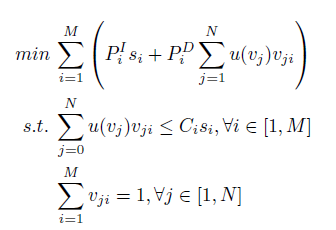

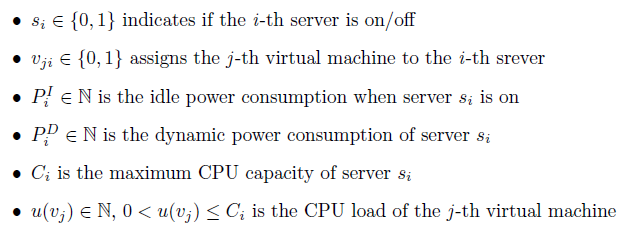

In [5]:
# load quadratic program from docplex model
qp = from_docplex_mp(mdl)
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: ex157D

Minimize
 obj: si0 + si1 + si2 + si3 + si4 + [ 2 vj0i0*uj0 + 2 vj1i0*uj1 + 2 vj2i0*uj2
      + 2 vj3i0*uj3 + 2 vj4i0*uj4 + 2 vj0i1*uj0 + 2 vj1i1*uj1 + 2 vj2i1*uj2
      + 2 vj3i1*uj3 + 2 vj4i1*uj4 + 2 vj0i2*uj0 + 2 vj1i2*uj1 + 2 vj2i2*uj2
      + 2 vj3i2*uj3 + 2 vj4i2*uj4 + 2 vj0i3*uj0 + 2 vj1i3*uj1 + 2 vj2i3*uj2
      + 2 vj3i3*uj3 + 2 vj4i3*uj4 + 2 vj0i4*uj0 + 2 vj1i4*uj1 + 2 vj2i4*uj2
      + 2 vj3i4*uj3 + 2 vj4i4*uj4 ]/2
Subject To
 cons2: vj0i0 + vj1i0 + vj2i0 + vj3i0 + vj4i0 >= 50
 cons3: vj0i1 + vj1i1 + vj2i1 + vj3i1 + vj4i1 >= 50
 cons4: vj0i2 + vj1i2 + vj2i2 + vj3i2 + vj4i2 >= 50
 cons5: vj0i3 + vj1i3 + vj2i3 + vj3i3 + vj4i3 >= 50
 cons5a: vj0i4 + vj1i4 + vj2i4 + vj3i4 + vj4i4 >= 50
 cons14: si0 >= 1
 cons15: si1 >= 1
 cons16: si2 >= 1
 cons17: si3 >= 1
 cons17a: si4 >= 1
 cons22: uj0 >= 1
 cons23: uj1 >= 1
 cons24: uj2 >= 1
 cons25: uj3 >= 1
 cons25a: uj4 >= 1
 cons26: vj0i0 + vj0i1 + vj0i2

##Classical solution

In [6]:
admm_params = ADMMParameters(
                            rho_initial=1001,
                            beta=1000,
                            factor_c=900,
                            maxiter=100,
                            three_block=True, tol=1.e-6
                        )

In [7]:
# define QUBO optimizer
qubo_optimizer = exact
# qubo_optimizer = cplex  # uncomment to use CPLEX instead

# define classical optimizer
convex_optimizer = cobyla
# convex_optimizer = cplex  # uncomment to use CPLEX instead

# initialize ADMM with classical QUBO and convex optimizer
admm = ADMMOptimizer(
    params=admm_params, qubo_optimizer=qubo_optimizer, continuous_optimizer=convex_optimizer
)

In [8]:
# run ADMM to solve problem
import time
t1 = time.perf_counter()

# run ADMM to solve problem
result = admm.solve(qp)

t2 = time.perf_counter()
print('time taken to run:',round(t2-t1),' seconds')
#%tb
#%timeit

time taken to run: 889  seconds


In [9]:
print(result.prettyprint())

objective function value: 255.00000000000006
variable values: si0=1.0, si1=1.0, si2=1.0, si3=1.0, si4=1.0, vj0i0=10.814094524040147, vj1i0=9.894276634922118, vj2i0=9.26810319112548, vj3i0=9.996496655678946, vj4i0=10.027028994233325, vj0i1=9.873303849847044, vj1i1=10.217821830517714, vj2i1=9.928442829945586, vj3i1=10.029050701322342, vj4i1=9.951380788367354, vj0i2=9.816484699823501, vj1i2=10.115635048215129, vj2i2=10.076277176849901, vj3i2=9.935428721887076, vj4i2=10.056174353224405, vj0i3=9.759333153568853, vj1i3=10.50248634621702, vj2i3=10.097080860926626, vj3i3=9.603253567290949, vj4i3=10.037846071996569, vj0i4=9.74404625188091, vj1i4=10.495855217935306, vj2i4=10.026868803526337, vj3i4=9.618904087399793, vj4i4=10.114325639257654, uj0=0.9999999999999999, uj1=1.0, uj2=1.0, uj3=0.9999999999999999, uj4=1.0
status: INFEASIBLE


* objective function value: 255.0
* si0=1.0, si1=1.0, si2=1.0, si3=1.0, si4=1.0
* vj0i0=9.98, vj1i0=9.98, vj2i0=10.02, vj3i0=10.02, vj4i0=10.01
* vj0i1=10.17, vj1i1=10.08, vj2i1=10.09, vj3i1=9.98, vj4i1=9.68
* vj0i2=9.63, vj1i2=10.34, vj2i2=9.98, vj3i2=9.98, vj4i2=10.08
* vj0i3=9.90, vj1i3=10.05, vj2i3=10.00, vj3i3=10.00, vj4i3=10.04
* vj0i4=10.16, vj1i4=9.87, vj2i4=9.55, vj3i4=10.26, vj4i4=10.16
* uj0=1.0, uj1=1.0, uj2=1.0, uj3=1.0, uj4=1.0
* status: INFEASIBLE


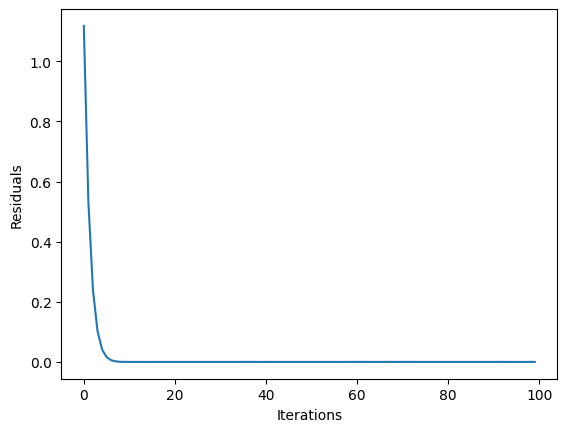

In [10]:
plt.plot(result.state.residuals)
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

In [11]:
# define QUBO optimizer
qubo_optimizer = qaoa

# define classical optimizer
convex_optimizer = cobyla
# convex_optimizer = cplex  # uncomment to use CPLEX instead

# initialize ADMM with quantum QUBO optimizer and classical convex optimizer
admm_q = ADMMOptimizer(
    params=admm_params, qubo_optimizer=qubo_optimizer, continuous_optimizer=convex_optimizer
)

In [12]:
# run ADMM to solve problem
result_q = admm_q.solve(qp)

In [13]:
print(result.prettyprint())

objective function value: 255.00000000000006
variable values: si0=1.0, si1=1.0, si2=1.0, si3=1.0, si4=1.0, vj0i0=10.814094524040147, vj1i0=9.894276634922118, vj2i0=9.26810319112548, vj3i0=9.996496655678946, vj4i0=10.027028994233325, vj0i1=9.873303849847044, vj1i1=10.217821830517714, vj2i1=9.928442829945586, vj3i1=10.029050701322342, vj4i1=9.951380788367354, vj0i2=9.816484699823501, vj1i2=10.115635048215129, vj2i2=10.076277176849901, vj3i2=9.935428721887076, vj4i2=10.056174353224405, vj0i3=9.759333153568853, vj1i3=10.50248634621702, vj2i3=10.097080860926626, vj3i3=9.603253567290949, vj4i3=10.037846071996569, vj0i4=9.74404625188091, vj1i4=10.495855217935306, vj2i4=10.026868803526337, vj3i4=9.618904087399793, vj4i4=10.114325639257654, uj0=0.9999999999999999, uj1=1.0, uj2=1.0, uj3=0.9999999999999999, uj4=1.0
status: INFEASIBLE


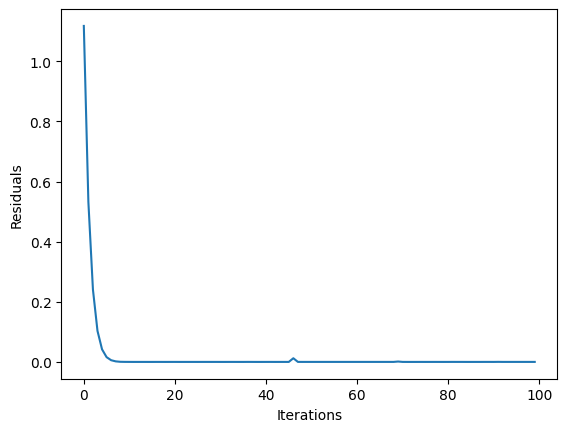

In [14]:
plt.clf()
plt.plot(result_q.state.residuals)
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

In [15]:
import qiskit.tools.jupyter

%qiskit_version_table
%qiskit_copyright

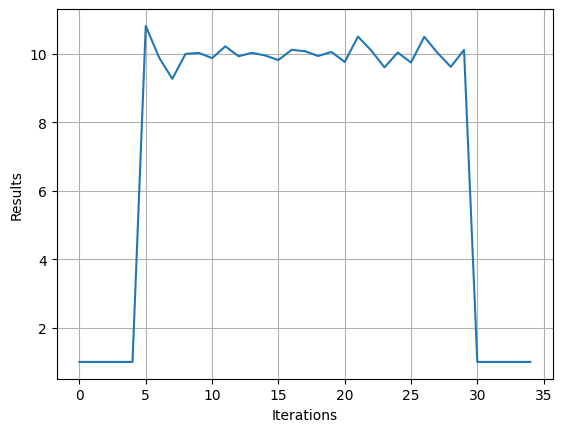

In [16]:
plt.plot(result.x)
plt.xlabel("Iterations")
plt.ylabel("Results")
plt.grid()
plt.show()

<qiskit_optimization.algorithms.admm_optimizer.ADMMState at 0x7f139d9c9a10>

##Quantum solution

In [17]:
# define QUBO optimizer
qubo_optimizer = qaoa

# define classical optimizer
convex_optimizer = cobyla
# convex_optimizer = cplex  # uncomment to use CPLEX instead

# initialize ADMM with quantum QUBO optimizer and classical convex optimizer
admm_q = ADMMOptimizer(
    params=admm_params, qubo_optimizer=qubo_optimizer, continuous_optimizer=convex_optimizer
)

In [18]:
# run ADMM to solve problem
import time
t1 = time.perf_counter()

result_q = admm_q.solve(qp)

t2 = time.perf_counter()
print('time taken to run:',round(t2-t1),' seconds')
#%tb
#%timeit

time taken to run: 907  seconds


In [19]:
print(result_q.prettyprint())

objective function value: 255.00000000000006
variable values: si0=1.0, si1=1.0, si2=1.0, si3=1.0, si4=1.0, vj0i0=10.814094524040147, vj1i0=9.894276634922118, vj2i0=9.26810319112548, vj3i0=9.996496655678946, vj4i0=10.027028994233325, vj0i1=9.873303849847044, vj1i1=10.217821830517714, vj2i1=9.928442829945586, vj3i1=10.029050701322342, vj4i1=9.951380788367354, vj0i2=9.816484699823501, vj1i2=10.115635048215129, vj2i2=10.076277176849901, vj3i2=9.935428721887076, vj4i2=10.056174353224405, vj0i3=9.759333153568853, vj1i3=10.50248634621702, vj2i3=10.097080860926626, vj3i3=9.603253567290949, vj4i3=10.037846071996569, vj0i4=9.74404625188091, vj1i4=10.495855217935306, vj2i4=10.026868803526337, vj3i4=9.618904087399793, vj4i4=10.114325639257654, uj0=0.9999999999999999, uj1=1.0, uj2=1.0, uj3=0.9999999999999999, uj4=1.0
status: INFEASIBLE


* objective function value: 255.0
* si0=1.0, si1=1.0, si2=1.0, si3=1.0, si4=1.0
* vj0i0=9.98, vj1i0=9.98, vj2i0=10.02, vj3i0=10.02, vj4i0=10.01
* vj0i1=10.17, vj1i1=10.08, vj2i1=10.08, vj3i1=9.98, vj4i1=9.68
* vj0i2=9.63, vj1i2=10.34, vj2i2=9.98, vj3i2=9.98, vj4i2=10.08
* vj0i3=9.90, vj1i3=10.05, vj2i3=10.00, vj3i3=10.00, vj4i3=10.04
* vj0i4=10.16, vj1i4=9.87, vj2i4=9.55, vj3i4=10.26, vj4i4=10.16
* uj0=1.0, uj1=1.0, uj2=1.0, uj3=1.0, uj4=1.0
* status: INFEASIBLE

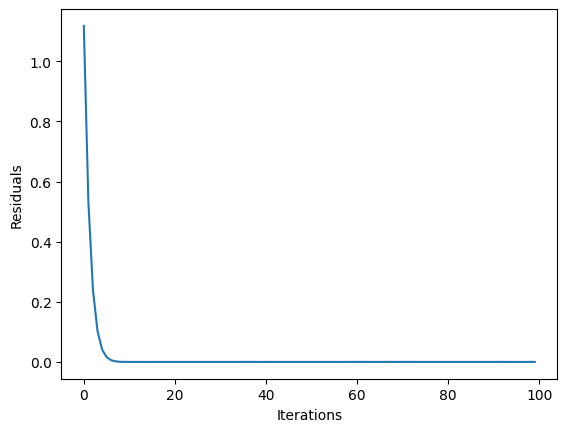

In [20]:
plt.clf()
plt.plot(result_q.state.residuals)
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

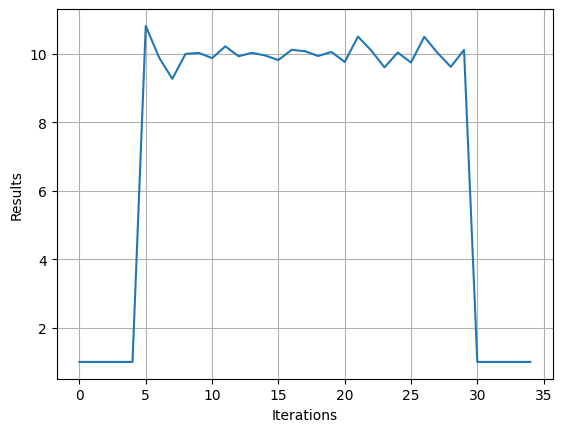

In [21]:
plt.plot(result_q.x)
plt.xlabel("Iterations")
plt.ylabel("Results")
plt.grid()
plt.show()

In [22]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright